# Neural network classifier for the classical MNIST handwritten digits database.
Built with PyTorch Framework to classify handwritten digits from 0 to 9.

## Packages

In [49]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Device configuration and hyper parameters

In [50]:
# torch.cuda.is_available()
# I am using GPU acceleration:
device = torch.device('cuda')

In [51]:
# Hyper parameters setting:
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 128
learning_rate = 0.001

## Data preparation

### MNIST dataset downloading

In [52]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [53]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

`DataLoader()` method takes dataset, splits examples into mini-batches and shuffle it. It returns iterable object consisting of mini-batches.

In [54]:
# Creating iterator for the train_loader object:
mini_batches = iter(train_loader)

In [55]:
# Taking one mini_batch from the mini_batches:
mini_batch, labels = mini_batches.next()
print(f"Mini-batch shape is: {mini_batch.shape}")
print(f"Labels shape is: {labels.shape}")

Mini-batch shape is: torch.Size([128, 1, 28, 28])
Labels shape is: torch.Size([128])


### Visualisation of exemplary handwritten digits

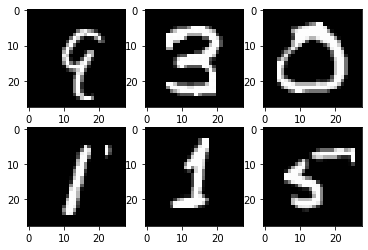

In [56]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(mini_batch[i][0], cmap='gray')

## Model building

In [57]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [58]:
# Instantiating model
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [59]:
# Creating loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training Loop

In [60]:
n_total_steps = len(train_loader) # number of mini-batches
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshaping mini-batch and pushing it to the device:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward step
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")    

Epoch 1/2, step 100/469, loss = 0.4635
Epoch 1/2, step 200/469, loss = 0.2602
Epoch 1/2, step 300/469, loss = 0.3160
Epoch 1/2, step 400/469, loss = 0.2871
Epoch 2/2, step 100/469, loss = 0.1698
Epoch 2/2, step 200/469, loss = 0.2820
Epoch 2/2, step 300/469, loss = 0.3220
Epoch 2/2, step 400/469, loss = 0.1771


## Test

In [64]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1) # torch.max() method returns tupple: (value, indices)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    accuracy = 100.0 * n_correct/n_samples
    print(f'Accuracy = {accuracy}')

Accuracy = 95.2
